In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [96, 96]    # they are already of this size

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [3]:
# add preprocessing layer to the front of VGG
# this is pretrained model on which we will train our images
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('Dataset/Train/*')

In [4]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)      

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()  # to get the image for training for each class

test_datagen = ImageDataGenerator()

In [7]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (96, 96),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
                        
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (96, 96),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3998 images belonging to 25 classes.
Found 1039 images belonging to 25 classes.


In [9]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
125/125 [==============================] - 1017s 8s/step - loss: 2.3969 - accuracy: 0.7731 - val_loss: 4.0343 - val_accuracy: 0.5034
Epoch 2/5
125/125 [==============================] - 974s 8s/step - loss: 0.0604 - accuracy: 0.9852 - val_loss: 3.2448 - val_accuracy: 0.5900
Epoch 3/5
125/125 [==============================] - 977s 8s/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 3.1715 - val_accuracy: 0.5948
Epoch 4/5
125/125 [==============================] - 975s 8s/step - loss: 6.9982e-04 - accuracy: 1.0000 - val_loss: 3.2357 - val_accuracy: 0.6112
Epoch 5/5
125/125 [==============================] - 985s 8s/step - loss: 2.1173e-04 - accuracy: 1.0000 - val_loss: 3.1585 - val_accuracy: 0.6266


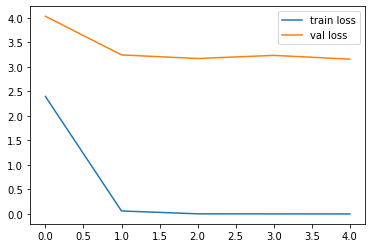

In [11]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')


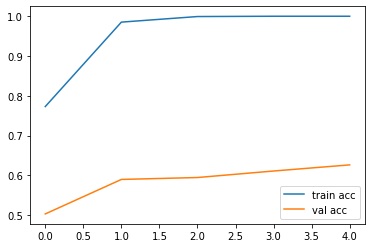

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')


In [10]:
# saving the model weights to use it to recognize the faces from the video
from tensorflow.keras.models import load_model

model.save('facefeatures_new_model.h5')